<a href="https://colab.research.google.com/github/rrizwan98/Lungs-cancer-stage-segmentation-cancer-stage-classification/blob/main/Lungs_Cancer_Stage_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **import necessary Library & read the Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data1= pd.read_csv('/content/drive/MyDrive/survey lung cancer.csv')
data1.tail()

,GENDER,AGE,S1OKING,YELLOW_0INGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,0ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSU1ING,COUGHING,SHORTNESS O0 BREATH,SWALLOWING DI00ICULTY,CHEST PAIN,LUNG_CANCER
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES
308,1,61,0,0,0,1,0,1,1,1,1,0,0,1,0,YES


## **Analyis The Data**

In [3]:
data1.drop([ 'LUNG_CANCER'], axis=1, inplace=True)
# data.drop([ 'peer_pressure'], axis=1, inplace=True)
data1.head()
# ['FATIGUE', 'LUNG_CANCER']

,GENDER,AGE,S1OKING,YELLOW_0INGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,0ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSU1ING,COUGHING,SHORTNESS O0 BREATH,SWALLOWING DI00ICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [4]:
# Column renameing

data1.rename(columns = {'YELLOW_0INGERS':'YELLOW_FINGERS', '0ATIGUE':'FATIGUE','ALCOHOL CONSU1ING':'ALCOHOL CONSUMING', "SHORTNESS O0 BREATH":"SHORTNESS OF BREATH",
                       "SWALLOWING DI00ICULTY":"SWALLOWING DIFFICULTY","S1OKING":"SMOKING"}, inplace = True)
data=data1
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,0ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   0ATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [6]:
data.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,0ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.417476,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,0.500221,8.407469,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,61.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


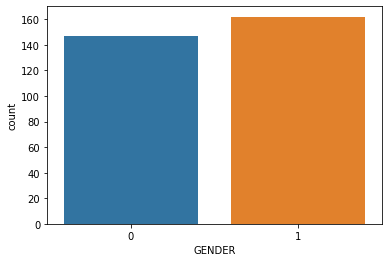

In [ ]:
sns.countplot(x="GENDER",data=data)

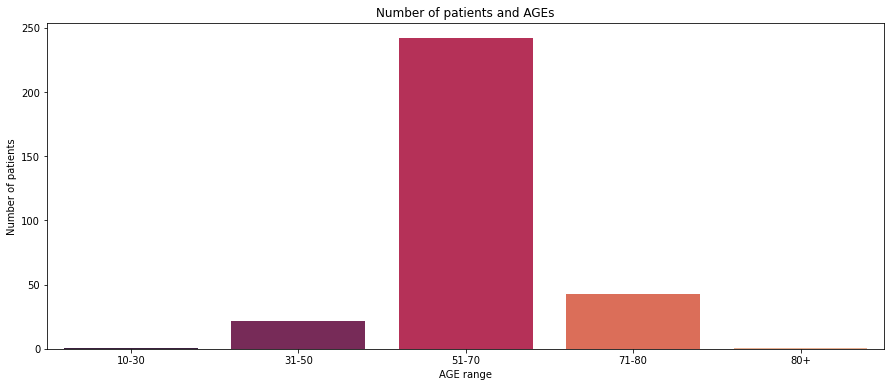

In [ ]:
#Count the range of the AGE of customers
AGE10_30 = data.AGE[(data.AGE <= 30) & (data.AGE >= 10)]
AGE31_50 = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]
AGE51_70 = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]
AGE71_80 = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]
AGE80above = data.AGE[data.AGE >= 81]

x = ["10-30","31-50","51-70","71-80","80+"]
y = [len(AGE10_30),len(AGE31_50),len(AGE51_70),len(AGE71_80),len(AGE80above)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of patients and AGEs")
plt.xlabel("AGE range")
plt.ylabel("Number of patients")
plt.show()

## **Major Lungs Cancer Risk Factor in Age 51-70 for M/F or Both**

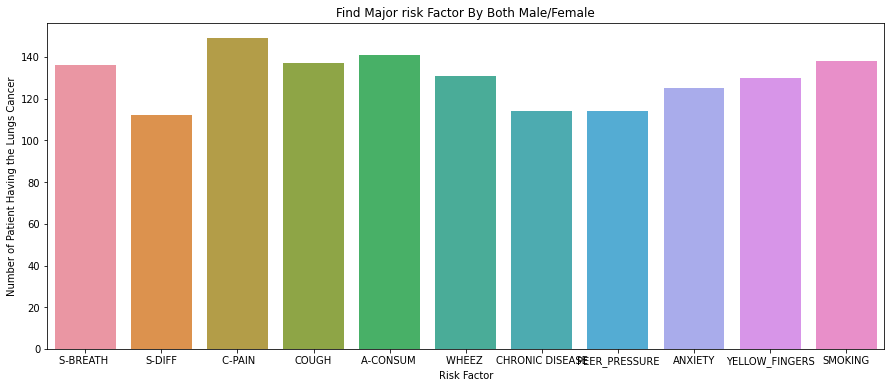

In [ ]:
cp = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["WHEEZING"] > 0)]  

chonic_des = ad_pp_a = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)]  [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Male/Female")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()

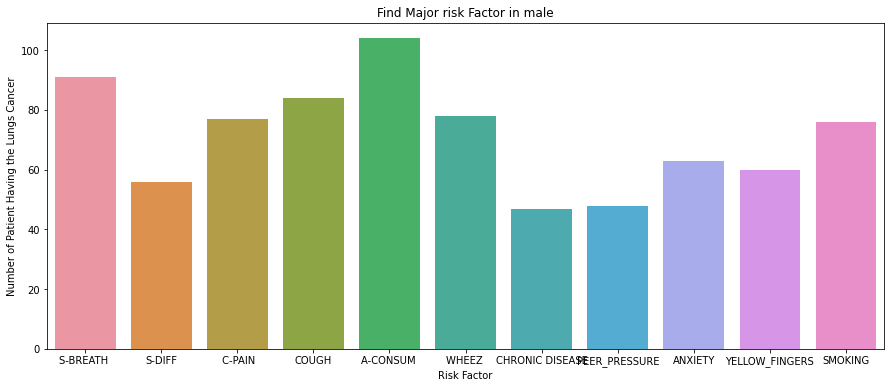

In [ ]:
# RISK FACTOR OF LUNGS CANCER IN AGE 51-70 FOR ONLY MENS

cp = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["WHEEZING"] > 0)]  

chonic_des = ad_pp_a = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']>0)] [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor in male")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()
# [(data['GENDER']>0)]

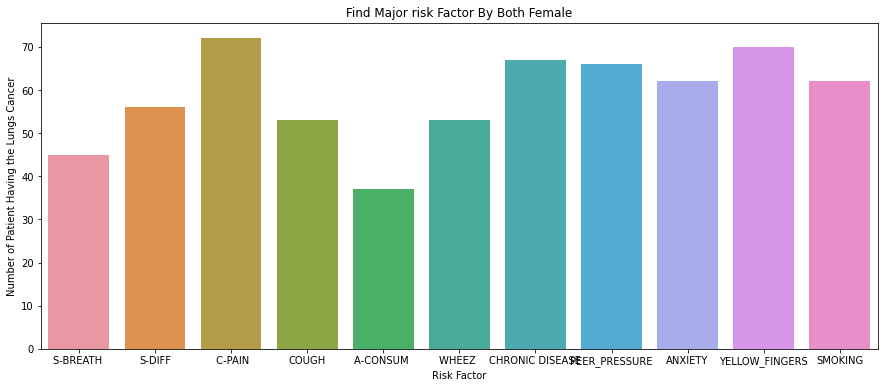

In [ ]:
# RISK FACTOR OF LUNGS CANCER IN AGE 51-70 FOR ONLY FEMALES

cp = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["WHEEZING"] > 0)]  

chonic_des = ad_pp_a = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 70) & (data.AGE >= 51)] [(data['GENDER']<1)] [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Female")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()
# [(data['GENDER']<1)] Female 

## **Major Lungs Cancer Risk Factor in Age 71-80 for M/F or Both**

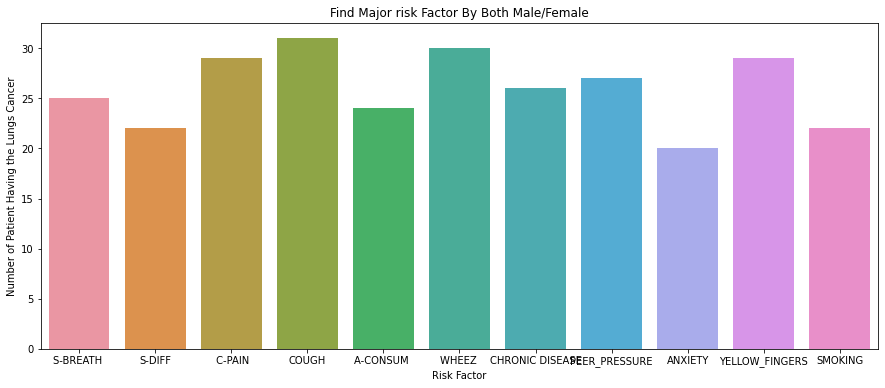

In [ ]:
# RISK FACTOR OF LUNGS CANCER BOTH MALE AND FEMALE.

cp = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["WHEEZING"] > 0)]  

chonic_des = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Male/Female")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()
# data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]

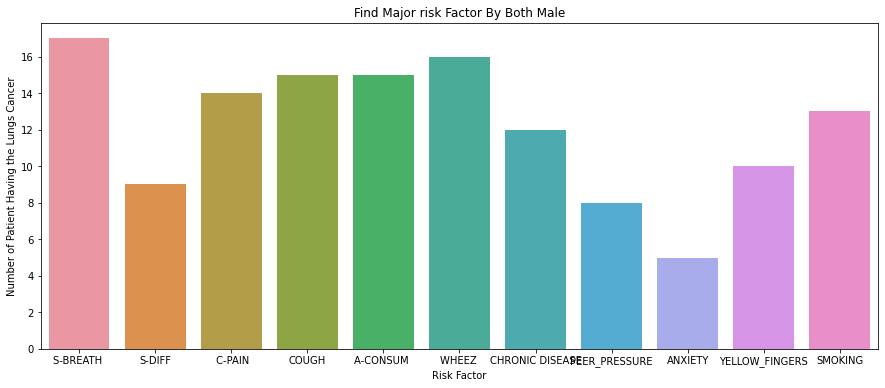

In [ ]:
# RISK FACTOR OF LUNGS CANCER ONLY MENS

cp = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["WHEEZING"] > 0)]  

chonic_des = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']>0)]  [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Male")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()
# [(data['GENDER']>0)]

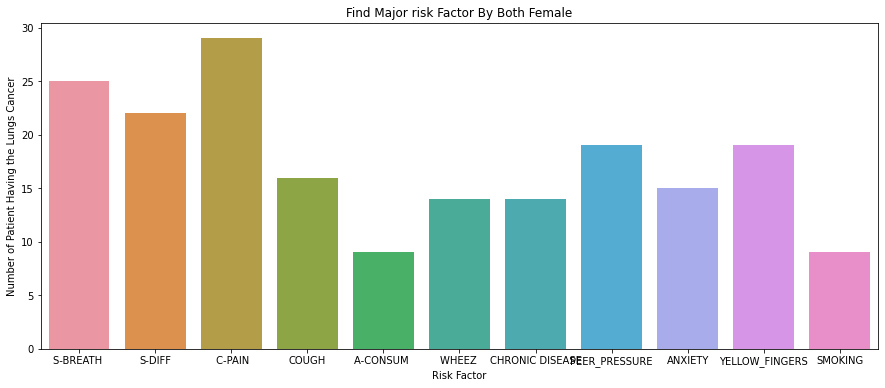

In [ ]:
# RISK FACTOR OF LUNGS CANCER ONLY FEMALES

cp = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)]  [(data['GENDER']<1)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["WHEEZING"] > 0)]  

chonic_des = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 80) & (data.AGE >= 71)] [(data['GENDER']<1)] [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Female")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()

# [(data['GENDER']<1)] 

## **Major Lungs Cancer Risk Factor in Age 31-50 for M/F or Both**

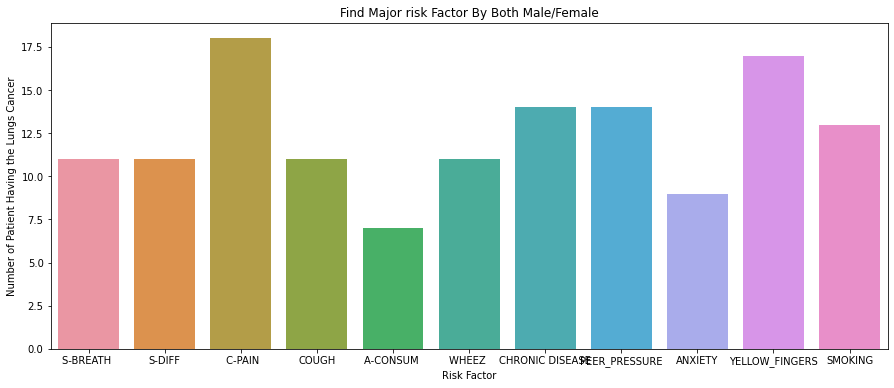

In [ ]:
# CALCULATE THE RISK FACTOR OF LUNGS CANCER IN AGE 31-50 BOTH MALE/FEMALES

cp = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["WHEEZING"] > 0)]  

chonic_des = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]  [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Male/Female")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()
# data.AGE[(data.AGE <= 50) & (data.AGE >= 31)]

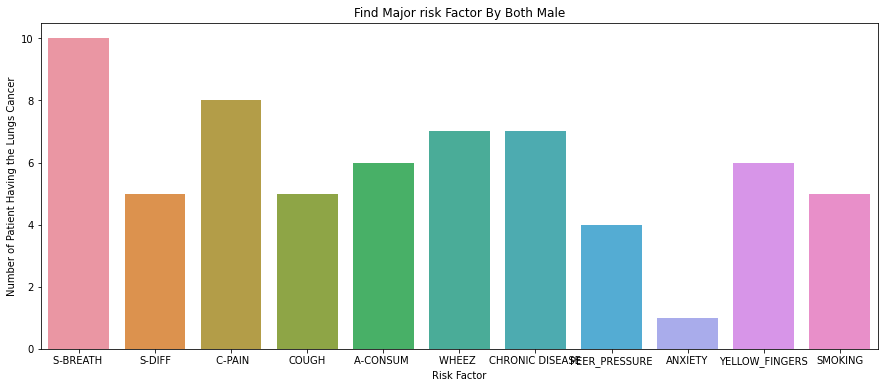

In [ ]:
# RISK FACTOR OF LUNGS CANCER IN AGE 31-50 ONLY MENS

cp = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["WHEEZING"] > 0)]  

chonic_des = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']>0)] [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Male")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()
# [(data['GENDER']>0)]

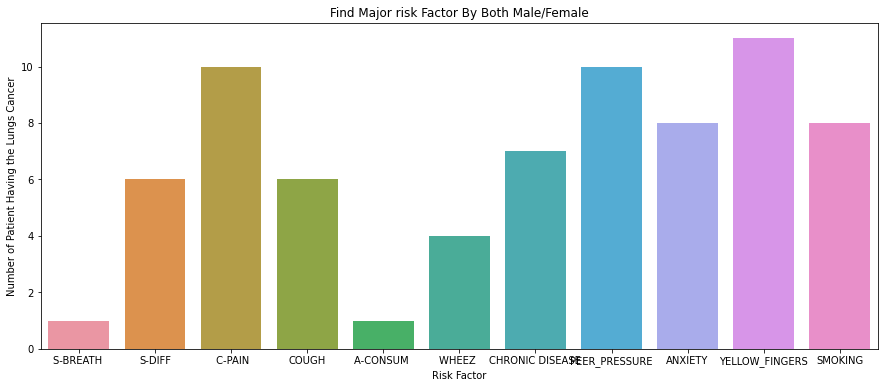

In [ ]:
# RISK FACTOR OF LUNGS CANCER IN AGE 31-50 ONLY FEMALES




cp = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["CHEST PAIN"] > 0)] 
swal_diff = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["SWALLOWING DIFFICULTY"] > 0) ]
short_breath=data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["SHORTNESS OF BREATH"] > 0)]

cough = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["COUGHING"] > 0) ]
alchol = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["ALCOHOL CONSUMING"] > 0) ]
wheez = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["WHEEZING"] > 0)]  

chonic_des = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["CHRONIC DISEASE"] > 0) ]
per_pres = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["PEER_PRESSURE"] > 0) ]
anxity = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["ANXIETY"] > 0)] 

Y_finger = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["YELLOW_FINGERS"] > 0) ]
smok = data.AGE[(data.AGE <= 50) & (data.AGE >= 31)] [(data['GENDER']<1)] [(data["SMOKING"] > 0)] 

#SHORTNESS OF BREATH ,	SWALLOWING DIFFICULTY	, CHEST PAIN", "COUGHING , ALCOHOL CONSUMING ,WHEEZING 
#CHRONIC DISEASE , PEER_PRESSURE , ANXIETY", "YELLOW_FINGERS , SMOKING
score_range = ["S-BREATH ",	"S-DIFF"	," C-PAIN" , "COUGH" , "A-CONSUM ","WHEEZ ",
               "CHRONIC DISEASE" , "PEER_PRESSURE" , "ANXIETY", "YELLOW_FINGERS" , "SMOKING"]
number = [len(cp) , len(swal_diff) , len(short_breath) , len(cough) , len(alchol) , len(wheez) , len(chonic_des) , len(per_pres), len(anxity) , len(Y_finger) , len(smok)]

plt.figure(figsize=(15,6))
sns.barplot(x=score_range, y=number)
plt.title("Find Major risk Factor By Both Male/Female")
plt.xlabel("Risk Factor")
plt.ylabel("Number of Patient Having the Lungs Cancer")
plt.show()

In [17]:
X1 = data[['GENDER',"AGE","CHEST PAIN","SWALLOWING DIFFICULTY","SHORTNESS OF BREATH","COUGHING","ALCOHOL CONSUMING","WHEEZING","YELLOW_FINGERS","SMOKING"]].values
# X1

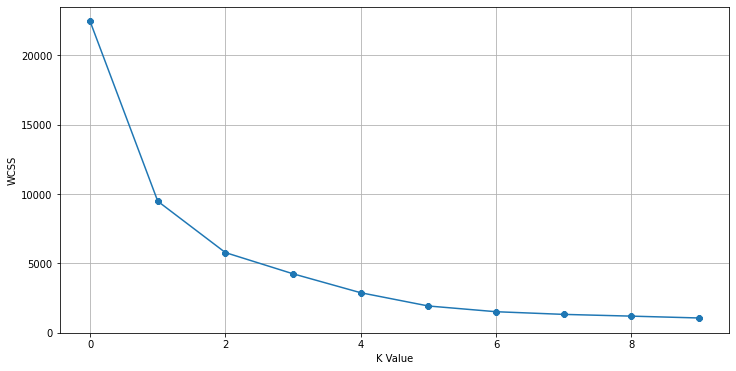

In [18]:
cluster_sumofsquare = [] # Will save the values of all clusters sum of squares, which means how far the observed values is from centroid

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    cluster_sumofsquare.append(kmeans.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(cluster_sumofsquare,marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [19]:
model = (KMeans(n_clusters = 3) )

model.fit(X1)
model

KMeans(n_clusters=3)

In [20]:
labels2 = model.labels_
centroids2 = model.cluster_centers_

print(labels2)  #Labels of each point, means to which cluster they belong
print(centroids2) #centroids of each cluster in both columns

[0 0 1 1 1 0 2 2 0 2 1 0 1 1 0 2 0 1 0 1 2 1 2 1 0 1 1 0 2 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 2 0 0 1 1 0 1 1 1 1 2 1 2 1 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 2 1 2 1 1 1 1 1 1 0 1 1 0 1 1 1 2 2 1
 1 0 1 0 0 1 2 1 1 0 1 1 0 0 2 2 1 1 1 2 1 1 0 0 0 1 0 1 1 2 1 1 1 1 1 2 1
 0 1 0 1 0 0 1 0 2 1 1 0 1 1 0 0 0 1 1 1 2 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 0 1 2 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 2 0 1 1 1 2 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0
 1 1 2 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 2 1 1 1 1 2 1 1 0 0 0 1 0 1
 1 2 1 1 1 1 1 2 1 0 1 0 1]
[[ 0.52830189 71.28301887  0.54716981  0.4245283   0.66981132  0.70754717
   0.58490566  0.59433962  0.54716981  0.52830189]
 [ 0.52325581 59.66860465  0.56395349  0.49418605  0.59883721  0.52325581
   0.55813953  0.54069767  0.56395349  0.5755814 ]
 [ 0.51612903 47.35483871  0.5483871   0.48387097  0.77419355  0.4516129
   0.4516129   0.51612903  0.67741935  0.61290323

In [23]:
# #Clusters in 3d projection
# data['label'] = labels2 
# # data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3],4:colors[4]})

# # fig = plt.figure(figsize=(20,10))
# # ax = fig.add_subplot(111, projection='3d')
# plt.scatter(data["GENDER"][data.label == 0],data["AGE"][data.label == 0], data["CHEST PAIN"][data.label == 0], data["SWALLOWING DIFFICULTY"][data.label == 0], data["SHORTNESS OF BREATH"][data.label == 0],
#            data["COUGHING"][data.label == 0], data["ALCOHOL CONSUMING"][data.label == 0], data["WHEEZING"][data.label == 0], data["YELLOW_FINGERS"][data.label == 0], data["SMOKING"][data.label == 0], c='blue', s=160)

# plt.scatter(data["GENDER"][data.label == 1],data["AGE"][data.label == 1], data["CHEST PAIN"][data.label == 1],data["SWALLOWING DIFFICULTY"][data.label == 1],data["SHORTNESS OF BREATH"][data.label == 1],
#            data["COUGHING"][data.label == 1],data["ALCOHOL CONSUMING"][data.label == 1],data["WHEEZING"][data.label == 1],data["YELLOW_FINGERS"][data.label == 1],data["SMOKING"][data.label == 1],c='red', s=160)

# plt.scatter(data["GENDER"][data.label == 2], data["AGE"][data.label == 2],data["CHEST PAIN"][data.label == 2],data["SWALLOWING DIFFICULTY"][data.label == 2],data["SHORTNESS OF BREATH"][data.label == 2],
#            data["COUGHING"][data.label == 2],data["ALCOHOL CONSUMING"][data.label == 2],data["WHEEZING"][data.label == 2],data["YELLOW_FINGERS"][data.label == 2],data["SMOKING"][data.label == 2], c='green', s=160)

# plt.scatter(data["GENDER"][data.label == 3],data["AGE"][data.label == 3], data["CHEST PAIN"][data.label == 3],data["SWALLOWING DIFFICULTY"][data.label == 3],data["SHORTNESS OF BREATH"][data.label == 3],
#            data["COUGHING"][data.label == 3],data["ALCOHOL CONSUMING"][data.label == 3],data["WHEEZING"][data.label == 3],data["YELLOW_FINGERS"][data.label == 3],data["SMOKING"][data.label == 3], c='orange', s=160)

# # ax.scatter(data["GENDER"][data.label == 4],data["AGE"][data.label == 4], data["CHEST PAIN"][data.label == 4],data["SWALLOWING DIFFICULTY"][data.label == 4],data["SHORTNESS OF BREATH"][data.label == 4],
# #            data["COUGHING"][data.label == 4],data["ALCOHOL CONSUMING"][data.label == 4],data["WHEEZING"][data.label == 4],data["YELLOW_FINGERS"][data.label == 4],data["SMOKING"][data.label == 4], c='purple', s=160)

# # ax.view_init(30, 185)
# plt.xlabel("Annual Income")
# plt.ylabel("Spending Score (1-100)")

# plt.show()

# # X1 = data[['GENDER',"CHEST PAIN","SWALLOWING DIFFICULTY","SHORTNESS OF BREATH","COUGHING","ALCOHOL CONSUMING","WHEEZING","YELLOW_FINGERS","SMOKING"]].values
# # # X1

TypeError: ignored

In [24]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,0ATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,label
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,0
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,0
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,0


In [25]:
# 164 male
# 152 Female.
data.to_csv('stages of lungs cancer dataset1.csv')